In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Public\GUVI\code\flight price prediction\Flight_Price.csv")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [3]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
data = data.drop_duplicates()

EDA Before Removing Outliers:
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline                  10683 non-null  object
 1   Source                   10683 non-null  object
 2   Destination              10683 non-null  object
 3   Total_Stops              10683 non-null  int64 
 4   Additional_Info          10683 non-null  object
 5   Price                    10683 non-null  int64 
 6   Day                      10683 non-null  int32 
 7   Month                    10683 non-null  int32 
 8   Year                     10683 non-null  int32 
 9   Dep_Time_Minutes         10683 non-null  int64 
 10  Arrival_Time_Minutes     10683 non-null  int64 
 11  Duration_Minutes         10683 non-null  int64 
 12  Airline_Encoded          10683 non-null  int64 
 13  Source_Encoded           10683 non-null 

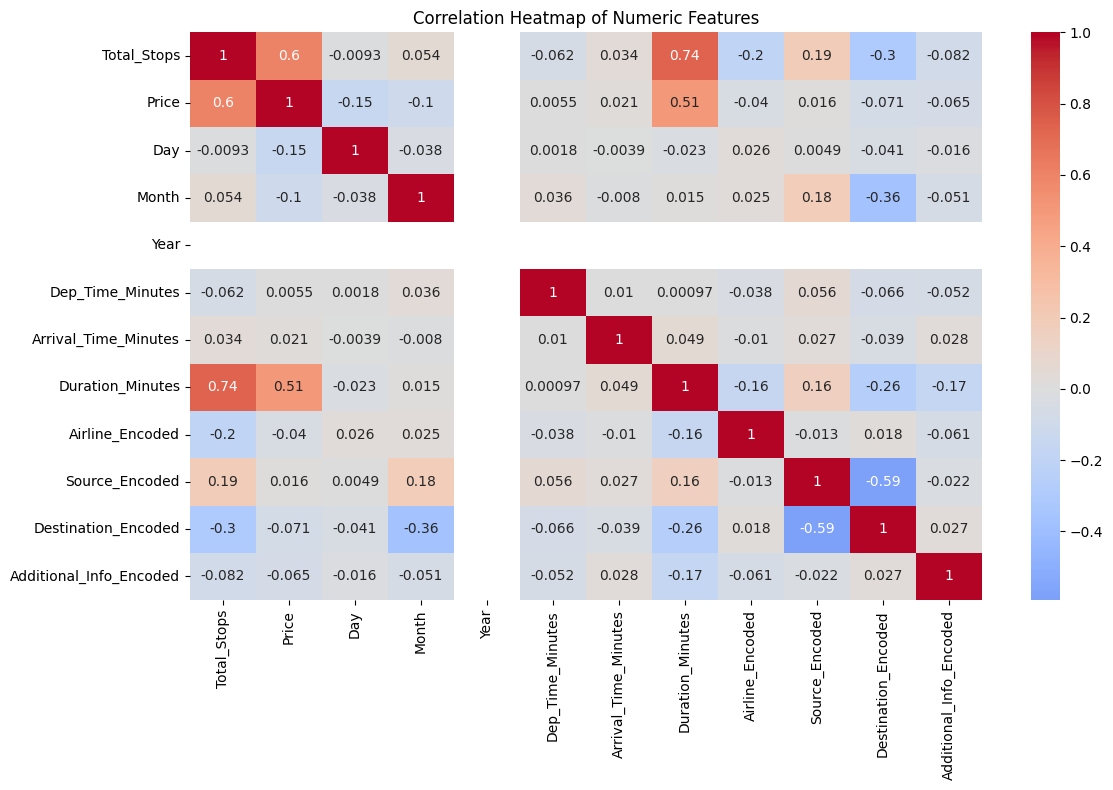

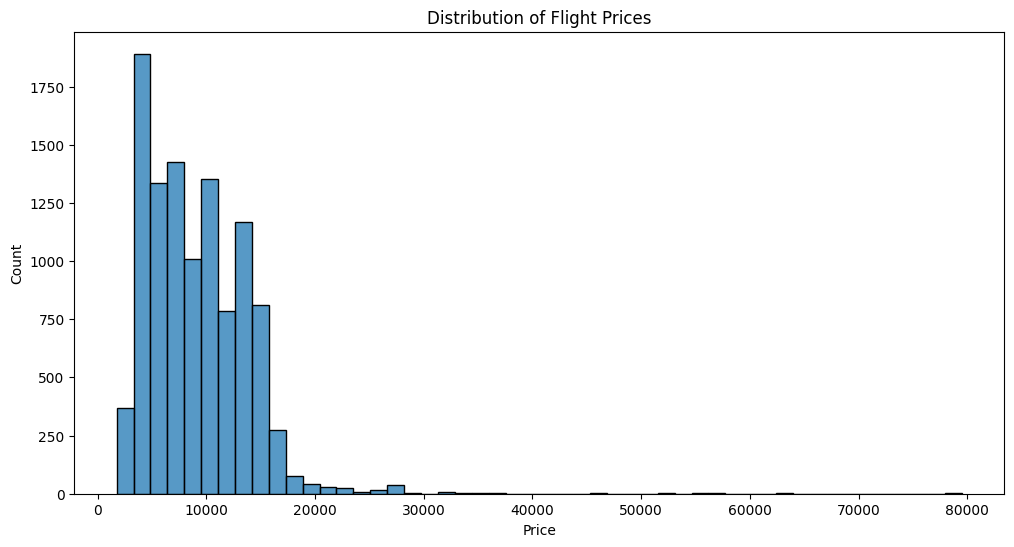

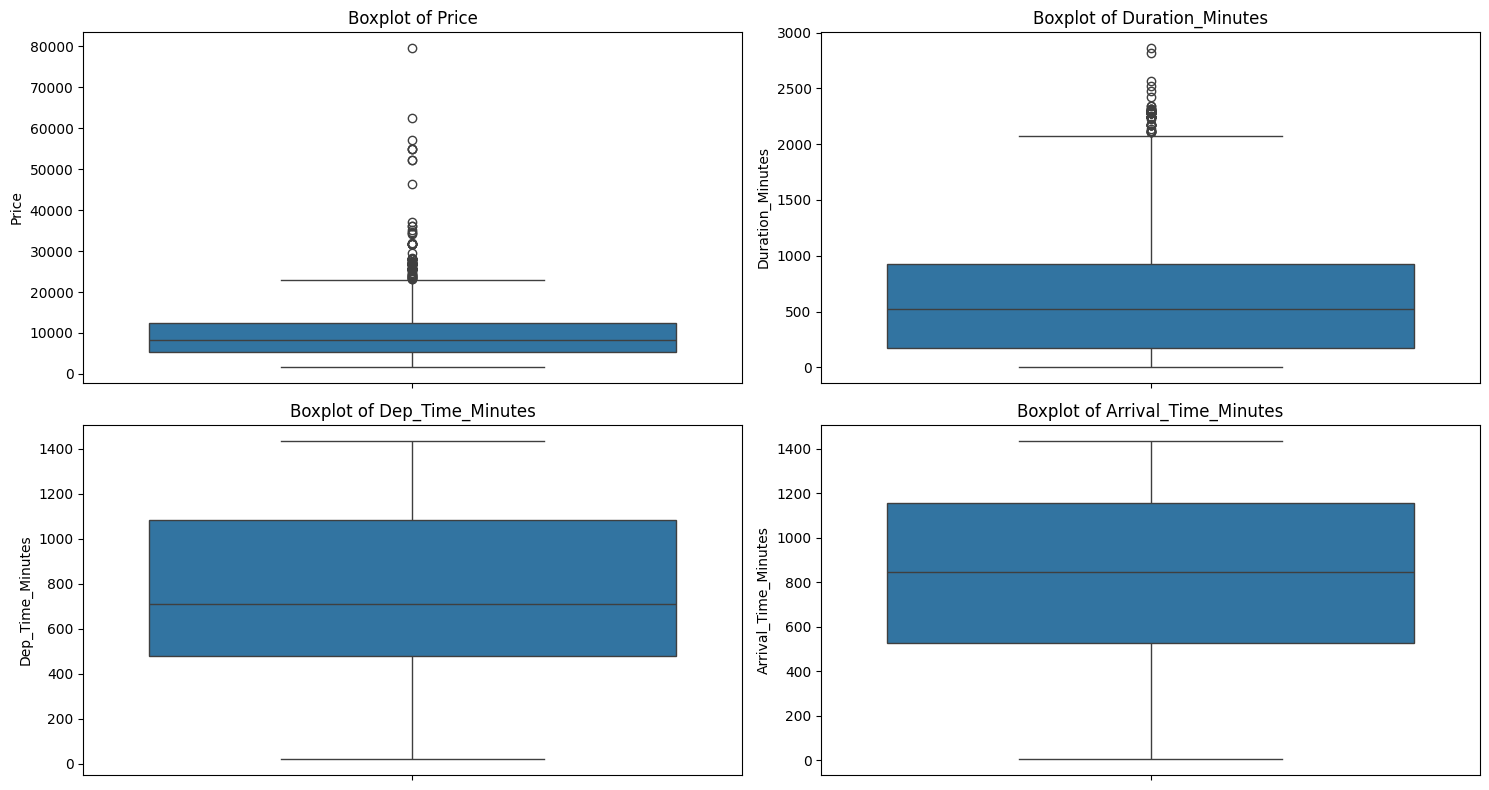


EDA After Removing Outliers:
Original dataset size: 10683
Dataset size after removing outliers: 10517
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10517 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline                  10517 non-null  object
 1   Source                   10517 non-null  object
 2   Destination              10517 non-null  object
 3   Total_Stops              10517 non-null  int64 
 4   Additional_Info          10517 non-null  object
 5   Price                    10517 non-null  int64 
 6   Day                      10517 non-null  int32 
 7   Month                    10517 non-null  int32 
 8   Year                     10517 non-null  int32 
 9   Dep_Time_Minutes         10517 non-null  int64 
 10  Arrival_Time_Minutes     10517 non-null  int64 
 11  Duration_Minutes         10517 non-null  int64 
 12  Airline_Encoded          

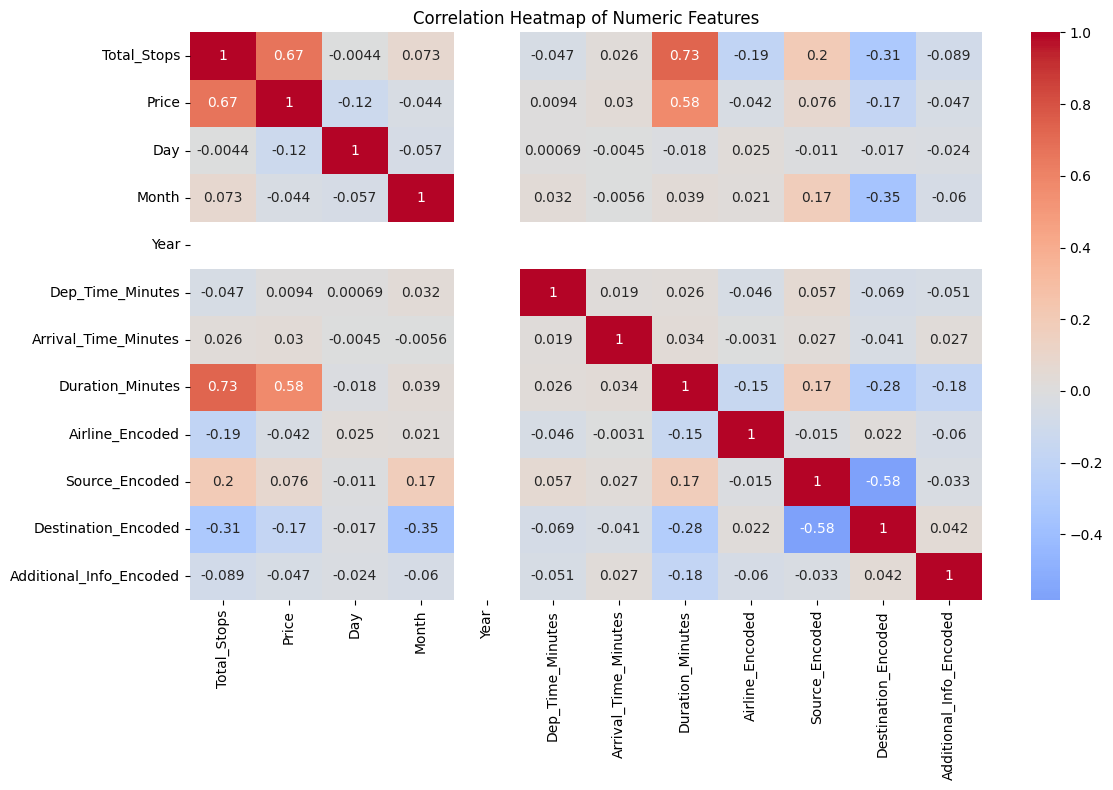

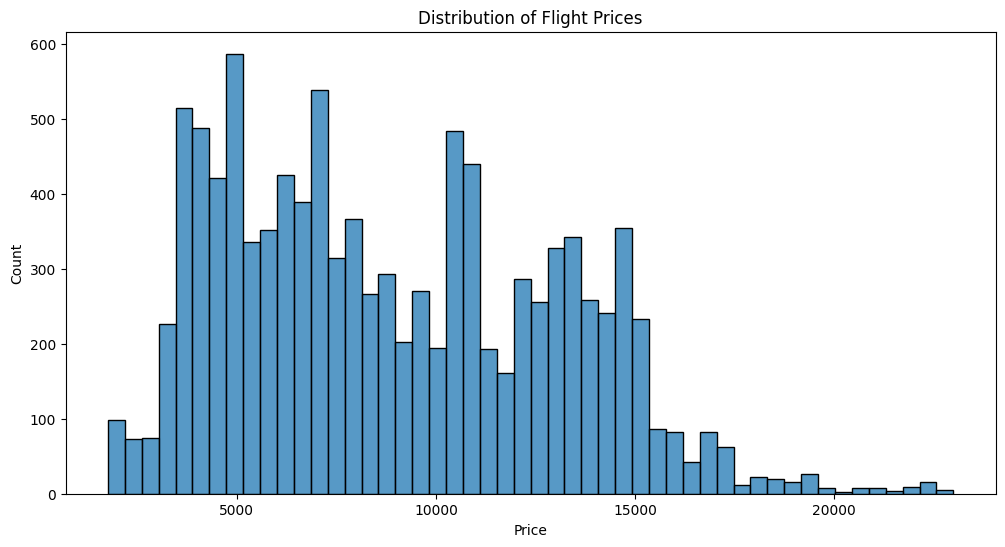

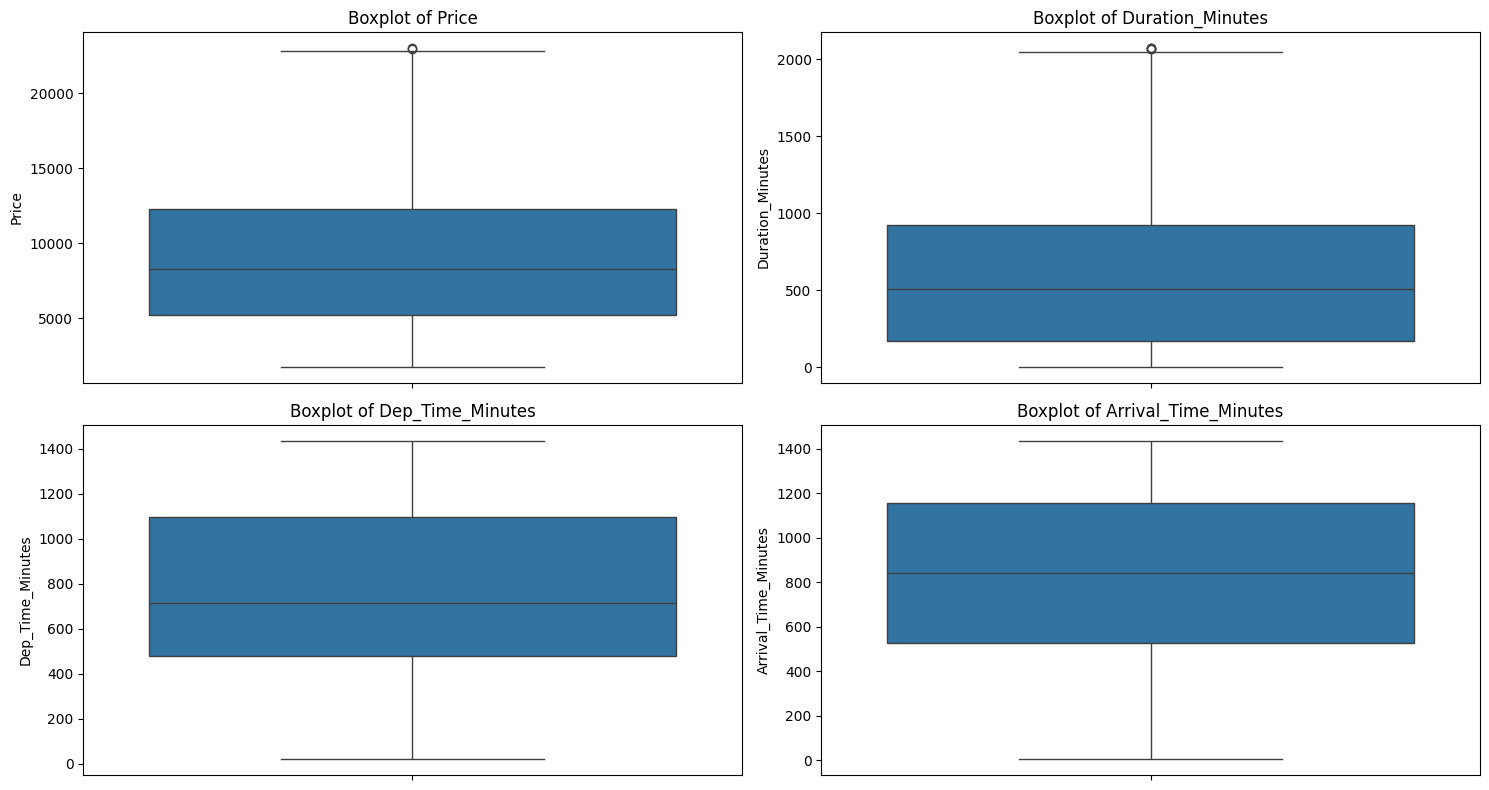

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_flight_data(df):
    data = df.copy()
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
    data['Day'] = data['Date_of_Journey'].dt.day
    data['Month'] = data['Date_of_Journey'].dt.month
    data['Year'] = data['Date_of_Journey'].dt.year
    
    def time_to_minutes(time_str):
        try:
            time = pd.to_datetime(time_str).strftime('%H:%M')
            hours, minutes = map(int, time.split(':'))
            return hours * 60 + minutes
        except:
            return np.nan
    
    data['Dep_Time_Minutes'] = data['Dep_Time'].apply(time_to_minutes)
    data['Arrival_Time_Minutes'] = data['Arrival_Time'].apply(time_to_minutes)
    
    def duration_to_minutes(duration):
        try:
            duration = str(duration)
            total_minutes = 0
            if 'h' in duration:
                hours = int(duration.split('h')[0])
                total_minutes += hours * 60
            if 'm' in duration:
                minutes = int(duration.split('h')[-1].split('m')[0])
                total_minutes += minutes
            return total_minutes
        except:
            return np.nan
    
    data['Duration_Minutes'] = data['Duration'].apply(duration_to_minutes)
    
    def clean_stops(stops):
        if pd.isna(stops) or stops == 'non-stop':
            return 0
        return int(stops.split()[0])
    
    data['Total_Stops'] = data['Total_Stops'].apply(clean_stops)
    
    le = LabelEncoder()
    categorical_cols = ['Airline', 'Source', 'Destination', 'Additional_Info']
    for col in categorical_cols:
        data[f'{col}_Encoded'] = le.fit_transform(data[col])
    
    columns_to_drop = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration']
    data = data.drop(columns=columns_to_drop)
    return data

def remove_outliers_iqr(data, columns):
    """
    Remove outliers from specified columns using the IQR method
    """
    data_clean = data.copy()
    
    for column in columns:
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a mask for outliers
        outlier_mask = (data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)
        data_clean = data_clean[outlier_mask]
    
    return data_clean

def perform_eda(data, show_outliers=True):
    print("Dataset Information:")
    print(data.info())
    print("\nMissing Values:")
    print(data.isnull().sum())
    print("\nDescriptive Statistics:")
    print(data.describe())
    
    # Correlation heatmap
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    correlation = data[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
    
    # Price distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Price'], bins=50)
    plt.title('Distribution of Flight Prices')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
    
    # Boxplots for numeric columns
    if show_outliers:
        numeric_cols_for_box = ['Price', 'Duration_Minutes', 'Dep_Time_Minutes', 'Arrival_Time_Minutes']
        plt.figure(figsize=(15, 8))
        for i, col in enumerate(numeric_cols_for_box, 1):
            plt.subplot(2, 2, i)
            sns.boxplot(y=data[col])
            plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

# Main execution
df = pd.read_csv(r"C:\Users\Public\GUVI\code\flight price prediction\Flight_Price.csv")
data = preprocess_flight_data(df)

# Show EDA with boxplots before removing outliers
print("EDA Before Removing Outliers:")
perform_eda(data)

# Remove outliers from numeric columns
numeric_cols_for_outliers = ['Price', 'Duration_Minutes', 'Dep_Time_Minutes', 'Arrival_Time_Minutes']
data_no_outliers = remove_outliers_iqr(data, numeric_cols_for_outliers)

# Show EDA after removing outliers
print("\nEDA After Removing Outliers:")
print(f"Original dataset size: {len(data)}")
print(f"Dataset size after removing outliers: {len(data_no_outliers)}")
perform_eda(data_no_outliers)



In [8]:
data = pd.get_dummies(data,columns=['Airline','Source','Destination','Additional_Info'],dtype='int',drop_first=True)
data

,Total_Stops,Price,Day,Month,Year,Dep_Time_Minutes,Arrival_Time_Minutes,Duration_Minutes,Airline_Encoded,Source_Encoded,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,1340,70,170,3,0,...,1,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,2019,350,795,445,1,3,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,2019,565,265,1140,4,2,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,2019,1085,1410,325,3,3,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,2019,1010,1295,285,3,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,1195,1345,150,0,3,...,0,0,0,0,0,0,0,0,1,0
10679,0,4145,27,4,2019,1245,1400,155,1,3,...,0,0,0,0,0,0,0,0,1,0
10680,0,7229,27,4,2019,500,680,180,4,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,12648,1,3,2019,690,850,160,10,0,...,1,0,0,0,0,0,0,0,1,0


In [7]:
# now data is ready for machine learning model evaluation


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

X = data.drop(['Price'],axis=1)
y = data['Price']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(), RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
accu = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f" R2 Score: {r2_score(y_train,train_pred)}")
    print(f"MSE train: {mean_squared_error(y_train,train_pred)}")

    print("********Test********")
    print(f" R2 Score: {r2_score(y_test,test_pred)}")
    print(f"MSE train: {mean_squared_error(y_test,test_pred)}")
    print("\n")
    if r2_score(y_test,test_pred) > score:
        best_algo = type(model).__name__
        accu = r2_score(y_test,test_pred)
best_algo




Model: LinearRegression
*******Train*******
 R2 Score: 0.6918760566836124
MSE train: 6558901.6841474315
********Test********
 R2 Score: 0.6873972816558132
MSE train: 6615913.319949686




NameError: name 'score' is not defined

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

# Set the experiment name
EXPERIMENT_NAME = "Regression models Comparison"

# Create or get the experiment
try:
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
    if experiment is None:
        # Create the experiment if it doesn't exist
        experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    else:
        experiment_id = experiment.experiment_id
except Exception as e:
    print(f"Error creating/getting experiment: {e}")
    # Create a new experiment as fallback
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

# Set the active experiment
mlflow.set_experiment(EXPERIMENT_NAME)

# Data preparation
X = data.drop(['Price'], axis=1)
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

best_score = 0
best_algo = None
best_run_id = None

# Train and evaluate models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Get the current run ID
        current_run_id = mlflow.active_run().info.run_id
        
        # Log model parameters
        params = model.get_params()
        mlflow.log_params(params)
        
        # Train model
        model.fit(x_train, y_train)
        
        # Make predictions
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)
        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)
        
        # Log metrics
        mlflow.log_metric("train_r2", train_r2)
        mlflow.log_metric("test_r2", test_r2)
        mlflow.log_metric("train_mse", train_mse)
        mlflow.log_metric("test_mse", test_mse)
        
        # Log model
        mlflow.sklearn.log_model(model, "model")
        
        # Print results
        print(f"Model: {name}")
        print("*******Train*******")
        print(f"R2 Score: {train_r2}")
        print(f"MSE: {train_mse}")
        print("********Test********")
        print(f"R2 Score: {test_r2}")
        print(f"MSE: {test_mse}")
        print("\n")
        
        # Track best model
        if test_r2 > best_score:
            best_score = test_r2
            best_algo = name
            best_run_id = current_run_id

print(f"Best algorithm: {best_algo} with R2 score: {best_score}")

# Load the best model using the saved run ID
if best_run_id:
    best_model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/model")
    print(f"Successfully loaded the best model (Run ID: {best_run_id})")

2025/01/05 10:38:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: LinearRegression
*******Train*******
R2 Score: 0.9840168960987351
MSE: 340225.44943307637
********Test********
R2 Score: 0.9049535267319649
MSE: 2011560.3339567962


🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/263551077312407267/runs/57dda3bb788a4af8995e57afd16f1a31
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/263551077312407267


2025/01/05 10:39:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: KNeighborsRegressor
*******Train*******
R2 Score: 0.9857483210457652
MSE: 303369.35224432487
********Test********
R2 Score: 0.8958615844473596
MSE: 2203981.891848386


🏃 View run KNeighborsRegressor at: http://127.0.0.1:5000/#/experiments/263551077312407267/runs/5e0faa77eaec4572bdc6b83f7d7a6d67
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/263551077312407267


2025/01/05 10:39:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: DecisionTreeRegressor
*******Train*******
R2 Score: 0.9955487213315
MSE: 94752.45202043842
********Test********
R2 Score: 0.8839745671778927
MSE: 2455558.3218426662


🏃 View run DecisionTreeRegressor at: http://127.0.0.1:5000/#/experiments/263551077312407267/runs/793cc2f27a964748b98e31af01924848
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/263551077312407267


2025/01/05 10:39:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: RandomForestRegressor
*******Train*******
R2 Score: 0.9934506037888758
MSE: 139414.17657109
********Test********
R2 Score: 0.894913152353267
MSE: 2224054.476493881


🏃 View run RandomForestRegressor at: http://127.0.0.1:5000/#/experiments/263551077312407267/runs/3a9a5ab2af1c429d8db25acce88eb012
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/263551077312407267


2025/01/05 10:39:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: AdaBoostRegressor
*******Train*******
R2 Score: 0.9668145087141767
MSE: 706405.2612761367
********Test********
R2 Score: 0.880370348654999
MSE: 2531837.8803184433


🏃 View run AdaBoostRegressor at: http://127.0.0.1:5000/#/experiments/263551077312407267/runs/b3f5ac7e153a46ac9e1f7662e80ad894
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/263551077312407267


2025/01/05 10:39:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: GradientBoostingRegressor
*******Train*******
R2 Score: 0.9887900630854969
MSE: 238621.0994068187
********Test********
R2 Score: 0.8981981210082307
MSE: 2154531.511386254


🏃 View run GradientBoostingRegressor at: http://127.0.0.1:5000/#/experiments/263551077312407267/runs/09302e7ae7e24877b209d1967d538f85
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/263551077312407267
Best algorithm: LinearRegression with R2 score: 0.9049535267319649
Successfully loaded the best model (Run ID: 57dda3bb788a4af8995e57afd16f1a31)


In [10]:
data['predictions'] = model.predict(X)

In [11]:
data[['Price', 'predictions']]

,Price,predictions
0,3897,6395.484080
1,7662,11922.083099
2,13882,15909.370568
3,6218,7271.377389
4,13302,9989.549314
...,...,...
10678,4107,5027.390012
10679,4145,5726.880583
10680,7229,9055.919524
10681,12648,9355.379561


In [ ]:
# price prediction is done 

In [20]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\bhask\Downloads\Passenger_Satisfaction.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# i need to perfom eda for machine learning

Original dataset shape: (103904, 25)
Shape after preprocessing: (103904, 24)

EDA Before Removing Outliers:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             1039

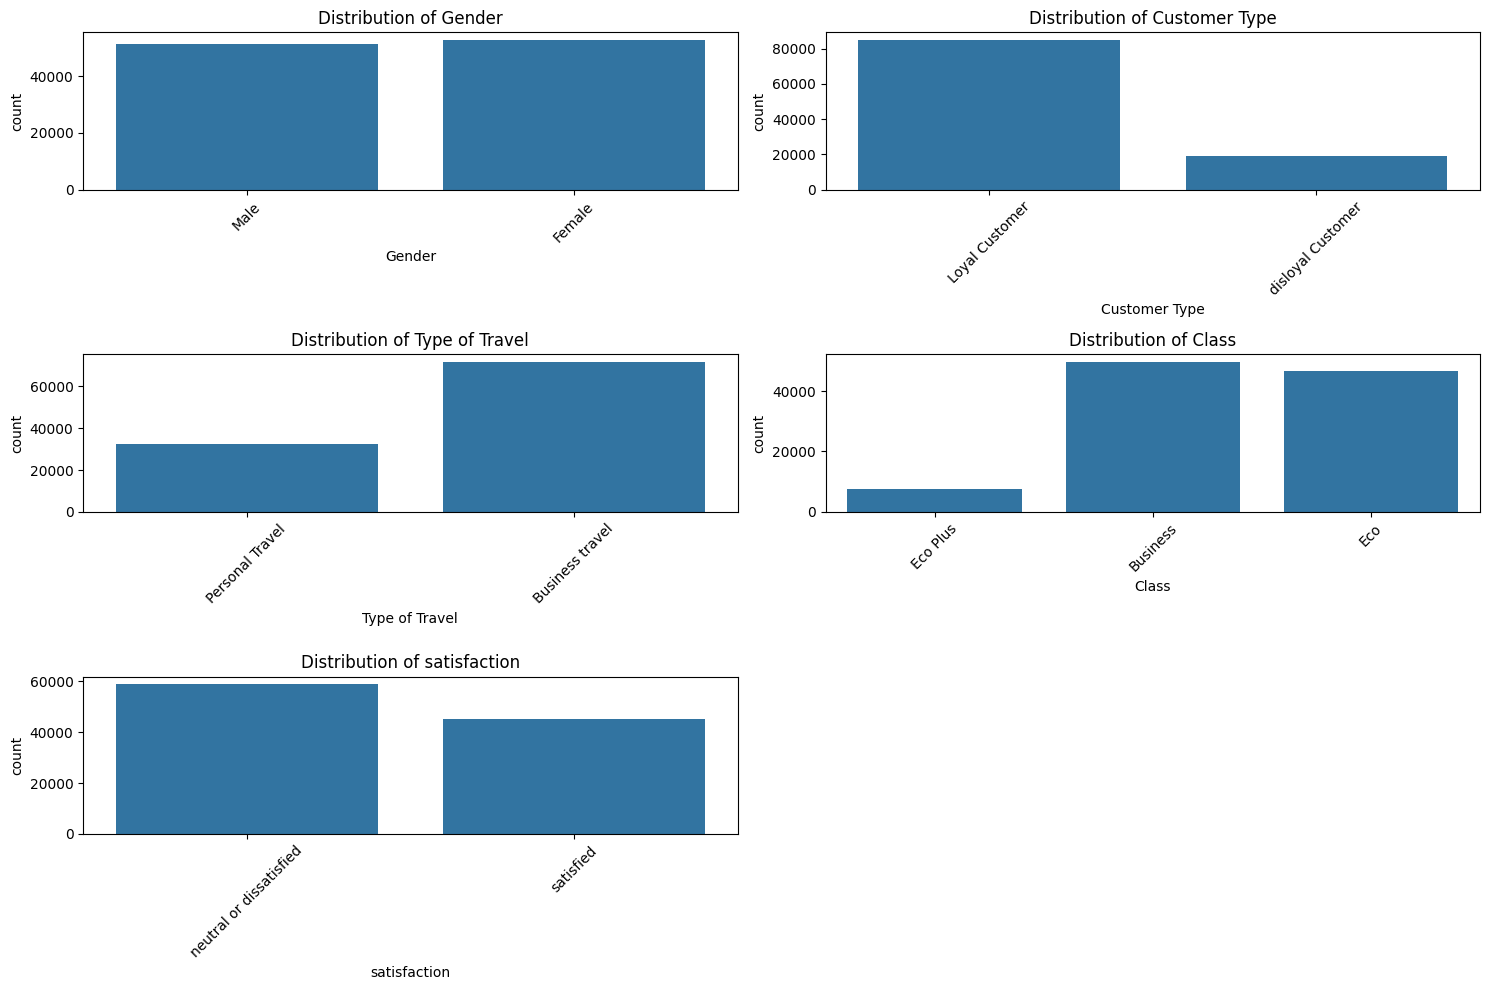

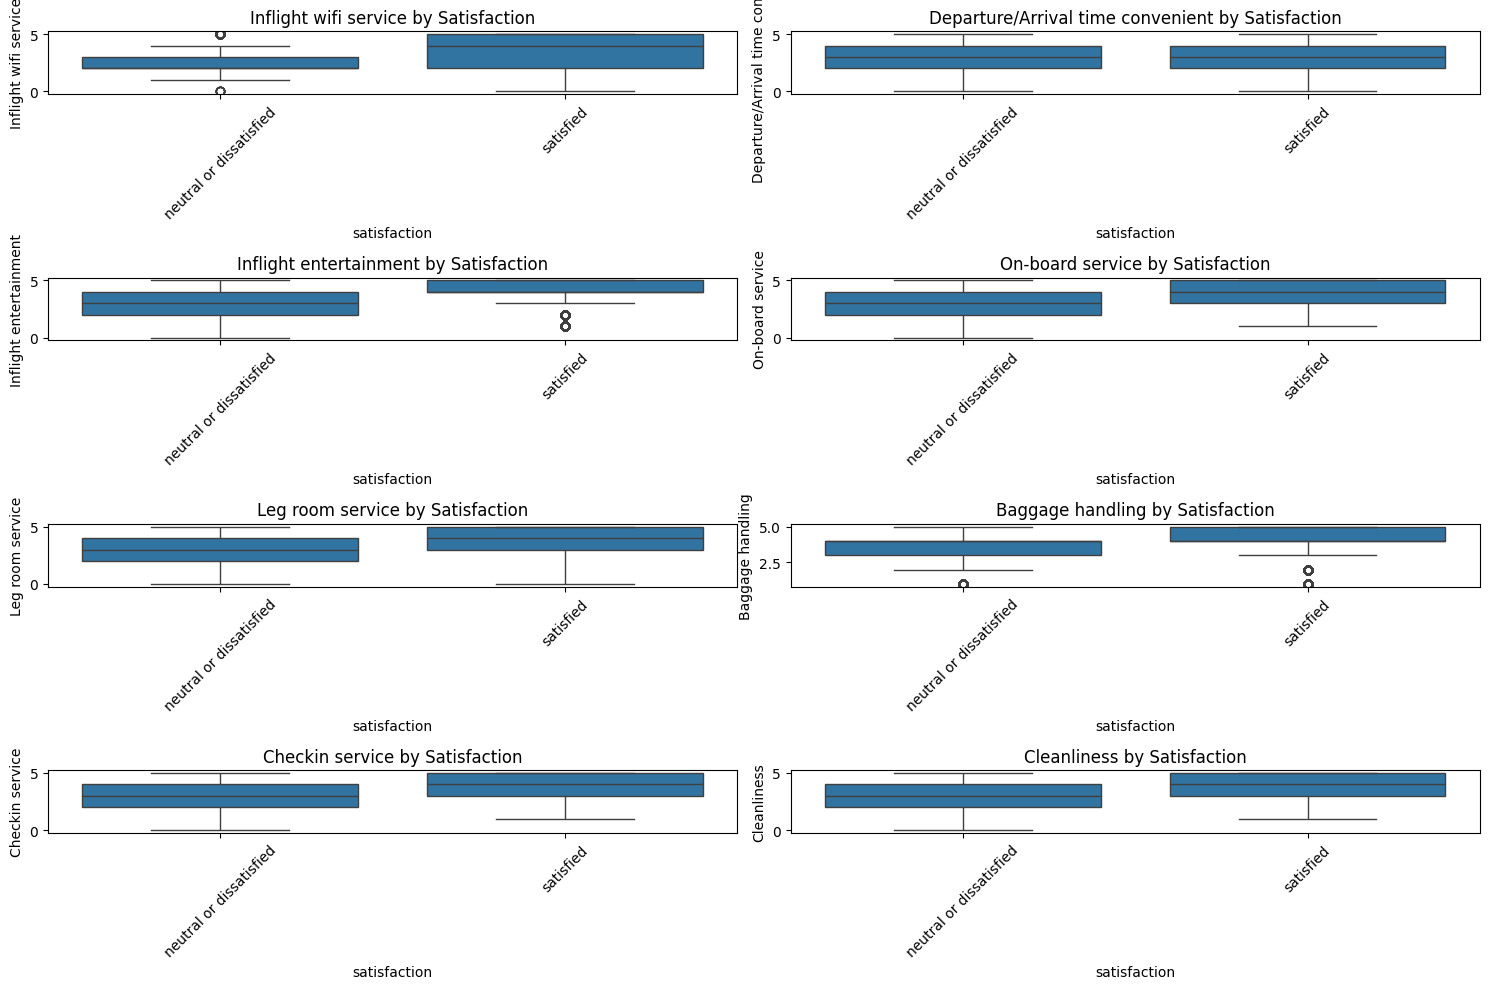

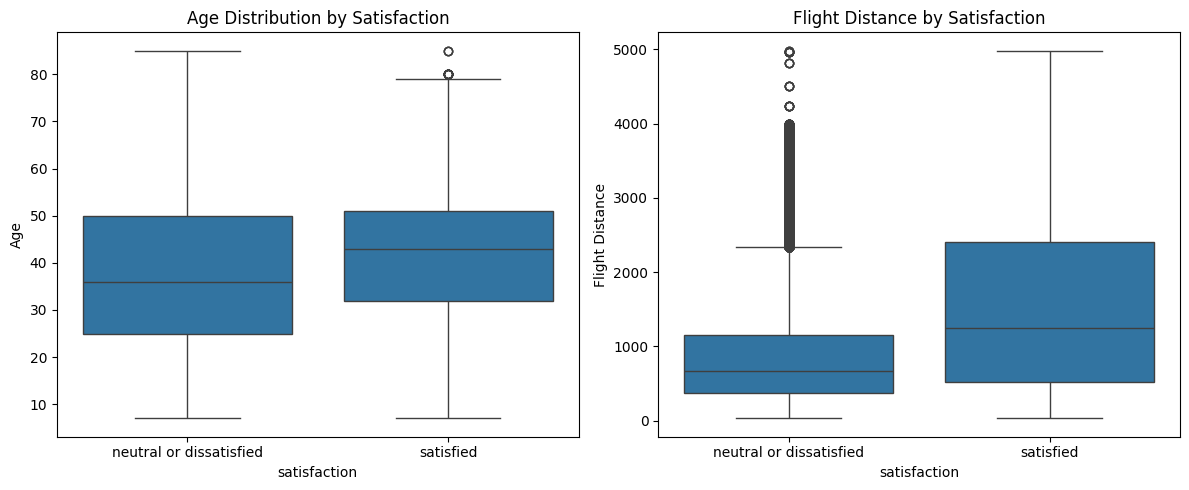

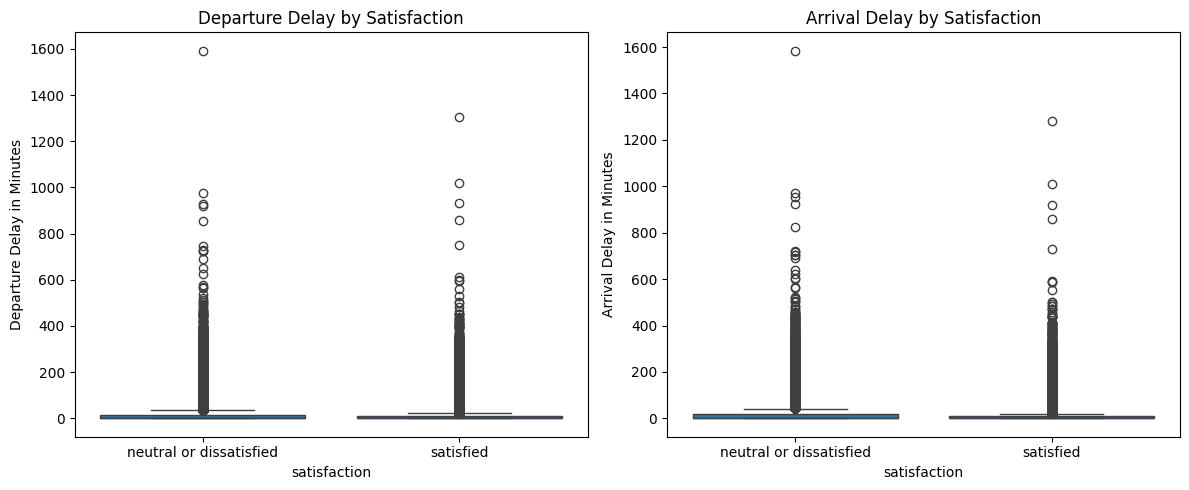


Satisfaction Rates by Categories:

Class wise Satisfaction Rate:
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.606352

Type of Travel wise Satisfaction Rate:
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757

Customer Type wise Satisfaction Rate:
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   52.270881  47.729119
disloyal Customer                76.334229  23.665771

Gender wise Satisfaction Rate:
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male   

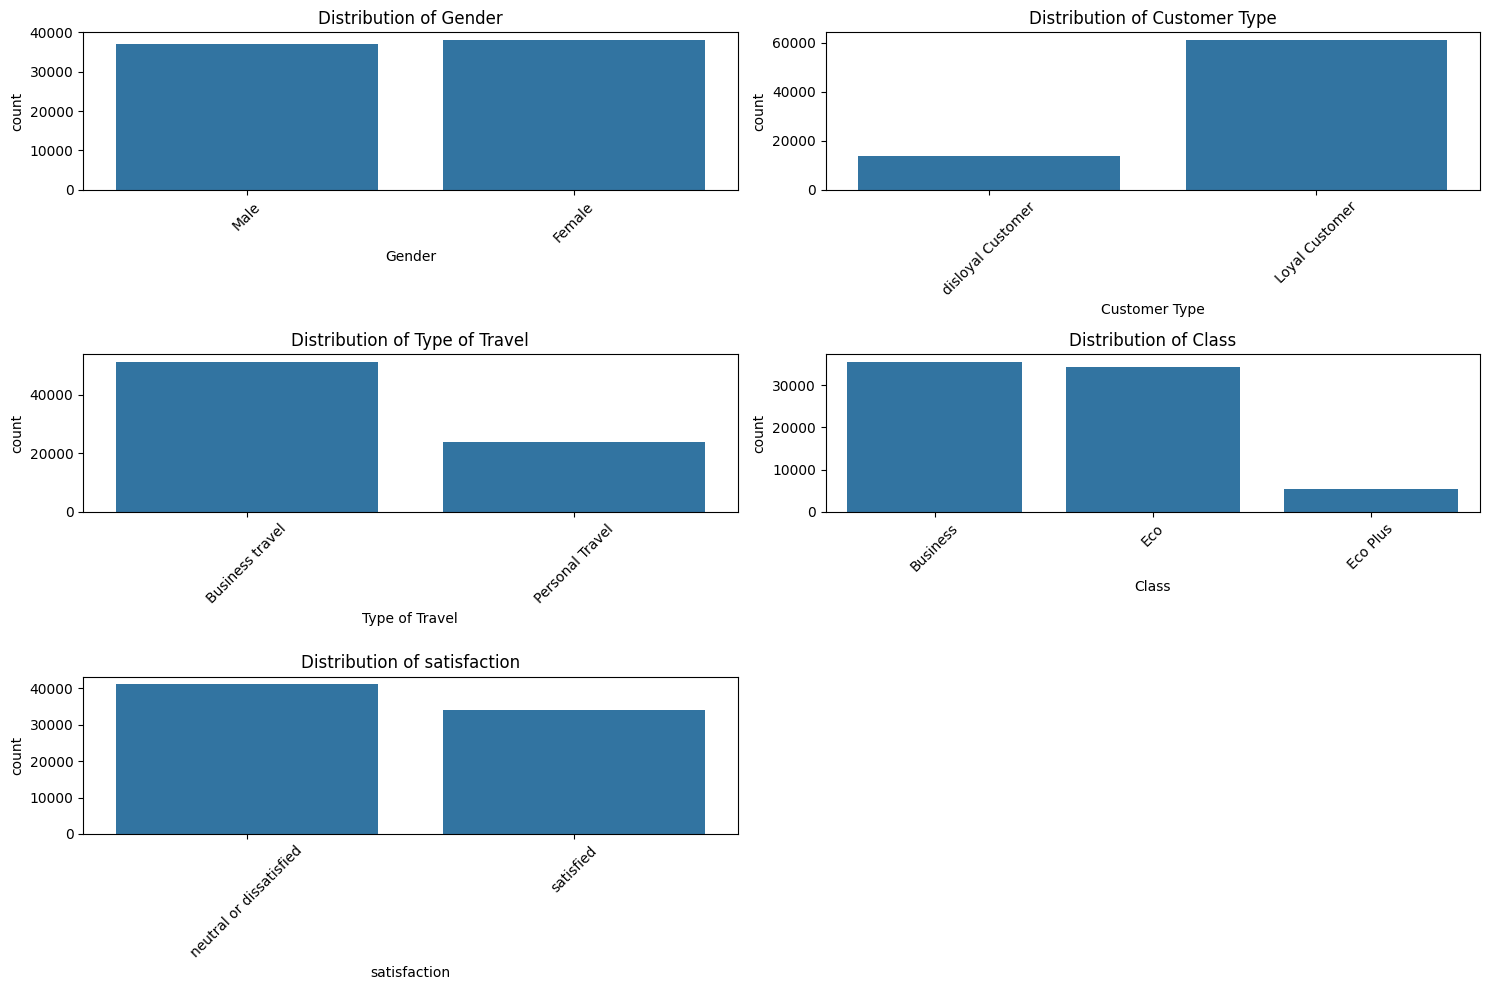

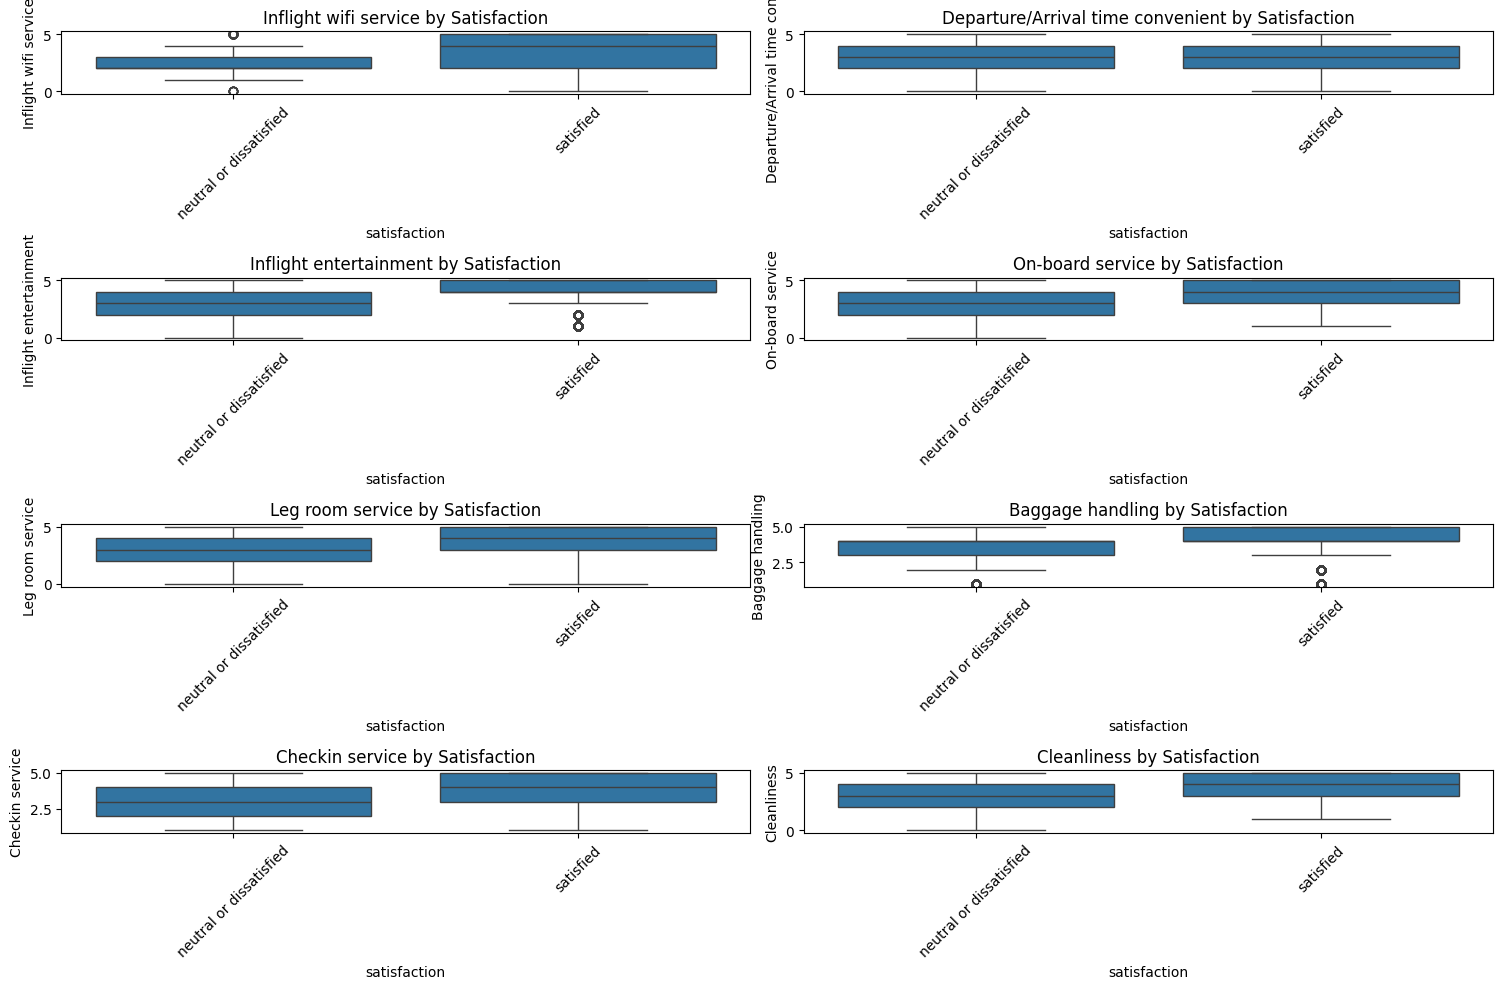

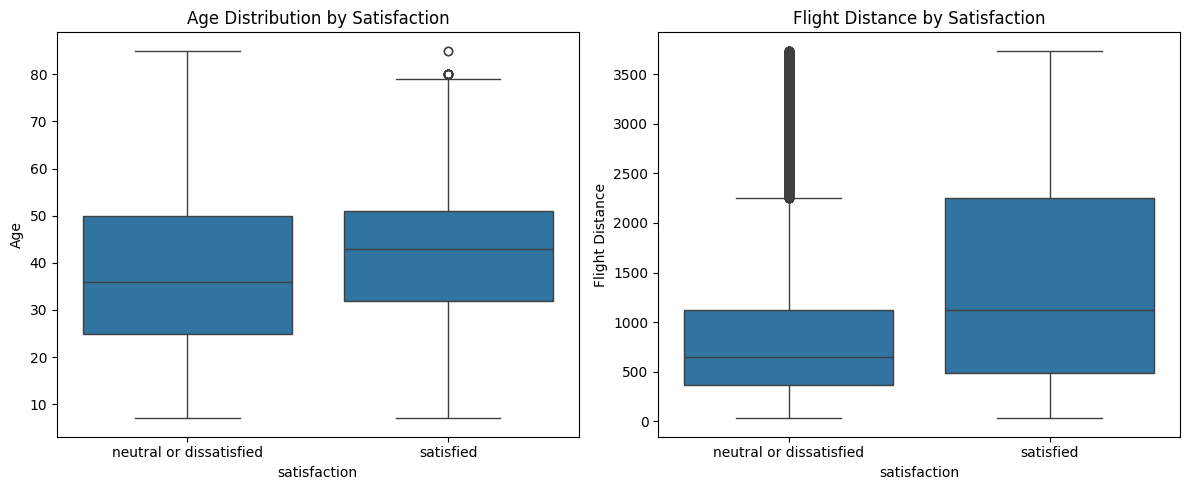

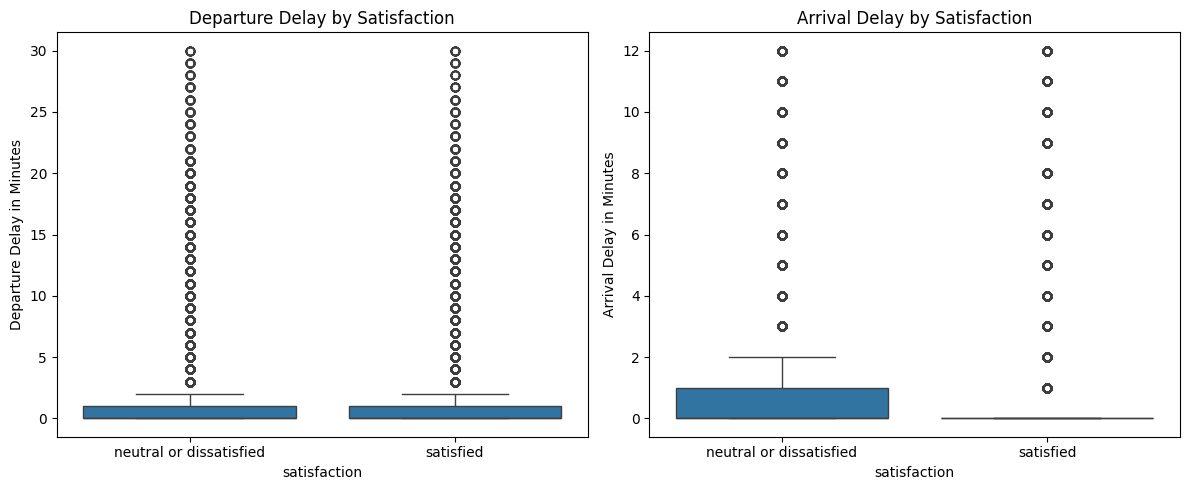


Satisfaction Rates by Categories:

Class wise Satisfaction Rate:
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    28.606440  71.393560
Eco                         79.177978  20.822022
Eco Plus                    72.176003  27.823997

Type of Travel wise Satisfaction Rate:
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                39.365086  60.634914
Personal Travel                87.848122  12.151878

Customer Type wise Satisfaction Rate:
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   50.320115  49.679885
disloyal Customer                74.427782  25.572218

Gender wise Satisfaction Rate:
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                       55.46957   44.53043
Male   

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    data = df.copy()
    
    # Drop unnamed column if it exists
    if 'Unnamed: 0' in data.columns:
        data = data.drop('Unnamed: 0', axis=1)
    
    # Handle duplicates
    data = data.drop_duplicates()
    
    return data

def remove_outliers_iqr(data, columns):
    """
    Remove outliers using IQR method
    """
    data_clean = data.copy()
    
    for column in columns:
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask = (data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)
        data_clean = data_clean[outlier_mask]
        
        print(f"Outliers removed from {column}: {len(data) - len(data_clean)}")
    
    return data_clean

def perform_eda(data, show_outliers=True):
    """
    Perform exploratory data analysis
    """
    print("\nDataset Information:")
    print(data.info())
    
    print("\nMissing Values:")
    print(data.isnull().sum())
    
    print("\nDescriptive Statistics:")
    print(data.describe())
    
    # Categorical variables analysis
    categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
    
    # Plot distribution of categorical variables
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(3, 2, i)
        sns.countplot(data=data, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Service ratings distribution
    service_cols = [
        'Inflight wifi service', 'Departure/Arrival time convenient',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Cleanliness'
    ]
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(service_cols, 1):
        plt.subplot(4, 2, i)
        sns.boxplot(data=data, x='satisfaction', y=col)
        plt.title(f'{col} by Satisfaction')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Age and Flight Distance distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x='satisfaction', y='Age')
    plt.title('Age Distribution by Satisfaction')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x='satisfaction', y='Flight Distance')
    plt.title('Flight Distance by Satisfaction')
    plt.tight_layout()
    plt.show()
    
    # Delay analysis
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x='satisfaction', y='Departure Delay in Minutes')
    plt.title('Departure Delay by Satisfaction')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x='satisfaction', y='Arrival Delay in Minutes')
    plt.title('Arrival Delay by Satisfaction')
    plt.tight_layout()
    plt.show()
    
    # Print category-wise satisfaction rates
    print("\nSatisfaction Rates by Categories:")
    for col in ['Class', 'Type of Travel', 'Customer Type', 'Gender']:
        print(f"\n{col} wise Satisfaction Rate:")
        satisfaction_rate = pd.crosstab(data[col], data['satisfaction'], normalize='index') * 100
        print(satisfaction_rate)

# Main execution
def main():
    # Read the data
    df = pd.read_csv(r"C:\Users\Public\GUVI\code\flight price prediction\Passenger_Satisfaction.csv")  # Replace with your file path
    print("Original dataset shape:", df.shape)
    
    # Preprocess the data
    data = preprocess_data(df)
    print("Shape after preprocessing:", data.shape)
    
    # Show EDA before removing outliers
    print("\nEDA Before Removing Outliers:")
    perform_eda(data)
    
    # Remove outliers from numeric columns only
    numeric_cols_for_outliers = ['Age', 'Flight Distance', 
                                'Departure Delay in Minutes', 
                                'Arrival Delay in Minutes']
    
    data_no_outliers = remove_outliers_iqr(data, numeric_cols_for_outliers)
    print(f"\nDataset size after removing outliers: {len(data_no_outliers)}")
    
    # Show EDA after removing outliers
    print("\nEDA After Removing Outliers:")
    perform_eda(data_no_outliers)
    
    # Save the processed data in 'passengers' variable
    passengers = data_no_outliers.copy()
    
    # Display information about the final dataset
    print("\nFinal 'passengers' dataset information:")
    print("Shape:", passengers.shape)
    print("\nColumns:", passengers.columns.tolist())
    
    return passengers

if __name__ == "__main__":
    passengers = main()
    # Now 'passengers' contains the cleaned dataset without encoding
    # You can use it for further analysis

In [15]:
passengers = pd.get_dummies(passengers,columns=['Gender','Customer Type','Type of Travel','Class','satisfaction'],dtype='int',drop_first=True)
passengers

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
1,5047,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,1,1,0,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,24026,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,1,0,0,0,0,1
5,111157,26,1180,3,4,2,1,1,2,1,...,4,1,0,0.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,60666,50,1620,3,1,3,4,2,3,2,...,4,2,0,0.0,1,0,1,1,0,0
103899,94171,23,192,2,1,2,3,2,2,2,...,3,2,3,0.0,0,1,0,1,0,0
103900,73097,49,2347,4,4,4,4,2,4,5,...,5,4,0,0.0,1,0,0,0,0,1
103902,54173,22,1000,1,1,1,5,1,1,1,...,4,1,0,0.0,0,1,0,1,0,0


In [ ]:
# this is classification problem so i need to deploy the classification model for prediction of satisfication 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X = passengers.drop(['satisfaction_satisfied'],axis=1)
y = passengers['satisfaction_satisfied']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
accu = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f"Accuracy Score: {accuracy_score(y_train,train_pred)}")
    print(f"Precision Score: {precision_score(y_train,train_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_train,train_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_train,train_pred,average='micro')}")
    print("********Test********")
    print(f"Accuracy Score: {accuracy_score(y_test,test_pred)}")
    print(f"Precision Score: {precision_score(y_test,test_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_test,test_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_test,test_pred,average='micro')}")
    print("\n")
    if accuracy_score(y_test,test_pred) > accu:
        best_algo = type(model).__name__
        accu = accuracy_score(y_test,test_pred)
best_algo



C:\Users\MP KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
*******Train*******
Accuracy Score: 0.7695902348167365
Precision Score: 0.7695902348167365
Recall score: 0.7695902348167365
F1 Score: 0.7695902348167365
********Test********
Accuracy Score: 0.7623228896427858
Precision Score: 0.7623228896427858
Recall score: 0.7623228896427858
F1 Score: 0.7623228896427858


Model: KNeighborsClassifier
*******Train*******
Accuracy Score: 0.7702554380363201
Precision Score: 0.7702554380363201
Recall score: 0.7702554380363201
F1 Score: 0.7702554380363201
********Test********
Accuracy Score: 0.6622098050954567
Precision Score: 0.6622098050954567
Recall score: 0.6622098050954567
F1 Score: 0.6622098050954567


Model: DecisionTreeClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 0.9372048160713098
Precision Score: 0.9372048160713098
Recall score: 0.9372048160713098
F1 Score: 0.9372048160713098


Model: RandomForestClassifier
*******Train*******

C:\Users\MP KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
*******Train*******
Accuracy Score: 0.9259628816603472
Precision Score: 0.9259628816603472
Recall score: 0.9259628816603472
F1 Score: 0.9259628816603472
********Test********
Accuracy Score: 0.925364198762722
Precision Score: 0.925364198762722
Recall score: 0.925364198762722
F1 Score: 0.925364198762722


Model: GradientBoostingClassifier
*******Train*******
Accuracy Score: 0.9415452670790927
Precision Score: 0.9415452670790927
Recall score: 0.9415452670790927
F1 Score: 0.9415452670790927
********Test********
Accuracy Score: 0.9401982305594359
Precision Score: 0.9401982305594359
Recall score: 0.9401982305594359
F1 Score: 0.9401982305594359




'RandomForestClassifier'

In [ ]:
# so we need to go with random forest classification 

In [17]:
passengers['predictions'] = model.predict(X)

In [18]:
passengers[['satisfaction_satisfied','predictions']]

,satisfaction_satisfied,predictions
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
...,...,...
103898,0,0
103899,0,0
103900,1,1
103902,0,0


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
import mlflow.sklearn

# Set the experiment name
EXPERIMENT_NAME = "Passenger Satisfaction Classification"

# Create or get the experiment
try:
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
    if experiment is None:
        experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    else:
        experiment_id = experiment.experiment_id
except Exception as e:
    print(f"Error creating/getting experiment: {e}")
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

# Set the active experiment
mlflow.set_experiment(EXPERIMENT_NAME)

# Data preparation
X = passengers.drop(['satisfaction_satisfied'], axis=1)
y = passengers['satisfaction_satisfied']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

best_accuracy = 0
best_algo = None
best_run_id = None

# Train and evaluate models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Get the current run ID
        current_run_id = mlflow.active_run().info.run_id
        
        # Log model parameters
        params = model.get_params()
        mlflow.log_params(params)
        
        # Train model
        model.fit(x_train, y_train)
        
        # Make predictions
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred, average='micro')
        train_recall = recall_score(y_train, train_pred, average='micro')
        train_f1 = f1_score(y_train, train_pred, average='micro')
        
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred, average='micro')
        test_recall = recall_score(y_test, test_pred, average='micro')
        test_f1 = f1_score(y_test, test_pred, average='micro')
        
        # Log metrics
        mlflow.log_metrics({
            "train_accuracy": train_accuracy,
            "train_precision": train_precision,
            "train_recall": train_recall,
            "train_f1": train_f1,
            "test_accuracy": test_accuracy,
            "test_precision": test_precision,
            "test_recall": test_recall,
            "test_f1": test_f1
        })
        
        # Log model
        mlflow.sklearn.log_model(model, "model")
        
        # Print results
        print(f"Model: {name}")
        print("*******Train*******")
        print(f"Accuracy Score: {train_accuracy}")
        print(f"Precision Score: {train_precision}")
        print(f"Recall Score: {train_recall}")
        print(f"F1 Score: {train_f1}")
        print("********Test********")
        print(f"Accuracy Score: {test_accuracy}")
        print(f"Precision Score: {test_precision}")
        print(f"Recall Score: {test_recall}")
        print(f"F1 Score: {test_f1}")
        print("\n")
        
        # Track best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_algo = name
            best_run_id = current_run_id

print(f"Best algorithm: {best_algo} with accuracy: {best_accuracy}")

# Load the best model
if best_run_id:
    best_model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/model")
    print(f"Successfully loaded the best model (Run ID: {best_run_id})")

C:\Users\MP KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/02/14 14:50:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: LogisticRegression
*******Train*******
Accuracy Score: 0.7867025876405241
Precision Score: 0.7867025876405241
Recall Score: 0.7867025876405241
F1 Score: 0.7867025876405241
********Test********
Accuracy Score: 0.7851393600745028
Precision Score: 0.7851393600745028
Recall Score: 0.7851393600745028
F1 Score: 0.7851393600745028




2025/02/14 14:51:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: KNeighborsClassifier
*******Train*******
Accuracy Score: 0.770421738841216
Precision Score: 0.770421738841216
Recall Score: 0.770421738841216
F1 Score: 0.770421738841216
********Test********
Accuracy Score: 0.6623428457393734
Precision Score: 0.6623428457393734
Recall Score: 0.6623428457393734
F1 Score: 0.6623428457393734




2025/02/14 14:51:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: DecisionTreeClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 0.9408634337790195
Precision Score: 0.9408634337790195
Recall Score: 0.9408634337790195
F1 Score: 0.9408634337790195




2025/02/14 14:51:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: RandomForestClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 0.954699660746358
Precision Score: 0.954699660746358
Recall Score: 0.954699660746358
F1 Score: 0.954699660746358




C:\Users\MP KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
2025/02/14 14:52:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: AdaBoostClassifier
*******Train*******
Accuracy Score: 0.9396826980642586
Precision Score: 0.9396826980642586
Recall Score: 0.9396826980642586
F1 Score: 0.9396826980642586
********Test********
Accuracy Score: 0.93800305993481
Precision Score: 0.93800305993481
Recall Score: 0.93800305993481
F1 Score: 0.93800305993481




2025/02/14 14:52:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: GradientBoostingClassifier
*******Train*******
Accuracy Score: 0.9423601410230825
Precision Score: 0.9423601410230825
Recall Score: 0.9423601410230825
F1 Score: 0.9423601410230825
********Test********
Accuracy Score: 0.940397791525311
Precision Score: 0.940397791525311
Recall Score: 0.940397791525311
F1 Score: 0.940397791525311


Best algorithm: RandomForestClassifier with accuracy: 0.954699660746358
Successfully loaded the best model (Run ID: 173b5eb5242749beb8df7ac7124a31c2)


In [ ]:
# in classification we apply random forest classifire it predicted well 
# in regression we apply rendom forest regression  it predicted well


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error

X1 = data.drop(['Price'],axis=1)
y1 = data['Price']


x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

models = [RandomForestRegressor()]
score = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f" R2 Score: {r2_score(y_train,train_pred)}")
    print(f"MSE train: {mean_squared_error(y_train,train_pred)}")

    print("********Test********")
    print(f" R2 Score: {r2_score(y_test,test_pred)}")
    print(f"MSE train: {mean_squared_error(y_test,test_pred)}")
    print("\n")
    if r2_score(y_test,test_pred) > score:
        best_algo = type(model).__name__
        accu = r2_score(y_test,test_pred)
best_algo



Model: RandomForestRegressor
*******Train*******
 R2 Score: 0.9803173314729325
MSE train: 418976.4883611758
********Test********
 R2 Score: 0.9060174300545119
MSE train: 1989043.920151889




'RandomForestRegressor'

In [21]:
data['predictions'] = model.predict(X1)
data

,Total_Stops,Price,Day,Month,Year,Dep_Time_Minutes,Arrival_Time_Minutes,Duration_Minutes,Airline_Encoded,Source_Encoded,...,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,predictions
0,0,3897,24,3,2019,1340,70,170,3,0,...,0,0,0,0,0,0,0,1,0,5736.512667
1,2,7662,1,5,2019,350,795,445,1,3,...,0,0,0,0,0,0,0,1,0,8005.470000
2,2,13882,9,6,2019,565,265,1140,4,2,...,0,0,0,0,0,0,0,1,0,13792.620000
3,1,6218,12,5,2019,1085,1410,325,3,3,...,0,0,0,0,0,0,0,1,0,6273.840000
4,1,13302,1,3,2019,1010,1295,285,3,0,...,0,0,0,0,0,0,0,1,0,12895.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,1195,1345,150,0,3,...,0,0,0,0,0,0,0,1,0,4118.430000
10679,0,4145,27,4,2019,1245,1400,155,1,3,...,0,0,0,0,0,0,0,1,0,4214.950000
10680,0,7229,27,4,2019,500,680,180,4,0,...,0,0,0,0,0,0,0,1,0,7229.000000
10681,0,12648,1,3,2019,690,850,160,10,0,...,0,0,0,0,0,0,0,1,0,11445.466667


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X = passengers.drop(['satisfaction_satisfied'],axis=1)
y = passengers['satisfaction_satisfied']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = [RandomForestClassifier()]
accu = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f"Accuracy Score: {accuracy_score(y_train,train_pred)}")
    print(f"Precision Score: {precision_score(y_train,train_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_train,train_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_train,train_pred,average='micro')}")
    print("********Test********")
    print(f"Accuracy Score: {accuracy_score(y_test,test_pred)}")
    print(f"Precision Score: {precision_score(y_test,test_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_test,test_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_test,test_pred,average='micro')}")
    print("\n")
    if accuracy_score(y_test,test_pred) > accu:
        best_algo = type(model).__name__
        accu = accuracy_score(y_test,test_pred)
best_algo



Model: RandomForestClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 0.9548327013902748
Precision Score: 0.9548327013902748
Recall score: 0.9548327013902748
F1 Score: 0.9548327013902748




'RandomForestClassifier'

In [23]:
passengers['predictions'] = model.predict(X)
passengers

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Arrival Delay in Minutes
- Baggage handling
- Checkin service
- Class_Eco
- ...
Feature names seen at fit time, yet now missing:
- Additional_Info_1 Short layover
- Additional_Info_2 Long layover
- Additional_Info_Business class
- Additional_Info_Change airports
- Additional_Info_Encoded
- ...


In [24]:
data.to_csv('price_pred.csv', index=False)
passengers.to_csv('satisfication_pred.csv', index=False)